<a href="https://colab.research.google.com/github/RajkumarGalaxy/rajkumar_nltk/blob/master/Zipf's_Law_and_Mandelbrot_Approx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Establishment of Zipf's Law and Mandelbrot Approximation, and their validation

### Jupyter Notebook on NLP using *nltk* platform

#### By [Rajkumar Lakshmanamoorthy](https://github.com/RajkumarGalaxy)

### Import libraries

In [20]:
import nltk
import pandas as pd

### Download necessary document from corpus

In [21]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Calculate word frequency

In [23]:
words = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
stop = set(nltk.corpus.stopwords.words('english'))
words = [i.lower() for i in words if i.isalpha() and i not in stop]

frequency = {}
for w in words:
  if w not in frequency.keys():
    frequency[w] = 1
  else:
    frequency[w] += 1

### Calculate rank
### Calculate Zipf's constant and Mandelbrot constant
## ------------------------------------------------
#### Zipf's constant = frequency * rank
#### Mandelbrot constant = frequency * (rank + 2.7)


In [24]:
rank = 1
beta = 2.7

table = pd.DataFrame(columns=['Rank','Frequency',"Zipf's Constant", "Mandelbrot Constant"])

for word, f in sorted(frequency.items(), key=lambda x: x[1], reverse=True):
  table.loc[word] = [rank, f, (rank*f), ((rank+beta)*f)]
  rank += 1


In [25]:
print(table.head(50).describe())
print('*'*100)
print(table.head(50))

           Rank    Frequency  Zipf's Constant  Mandelbrot Constant
count  50.00000    50.000000        50.000000            50.000000
mean   25.50000   450.240000      7772.660000          8988.308000
std    14.57738   439.956193      2381.632176          1844.645741
min     1.00000   209.000000      2306.000000          4930.500000
25%    13.25000   244.750000      5950.500000          7470.525000
50%    25.50000   357.500000      9013.500000          9919.350000
75%    37.75000   449.250000      9571.000000         10263.600000
max    50.00000  3178.000000     10486.000000         11758.600000
****************************************************************************************************
           Rank  Frequency  Zipf's Constant  Mandelbrot Constant
i           1.0     3178.0           3178.0              11758.6
mr          2.0     1153.0           2306.0               5419.1
emma        3.0      865.0           2595.0               4930.5
could       4.0      837.0          

In [26]:
print(table.sample(50).describe())
print('*'*100)
print(table.sample(50))


              Rank   Frequency  Zipf's Constant  Mandelbrot Constant
count    50.000000   50.000000        50.000000            50.000000
mean   3294.520000   10.520000      8984.680000          9013.084000
std    2035.458402   26.116099      3663.224137          3692.109452
min      63.000000    1.000000      4315.000000          4317.700000
25%    1490.750000    1.000000      5598.000000          5600.700000
50%    3262.500000    2.500000      8054.500000          8061.250000
75%    5147.000000    8.000000     11733.000000         11753.250000
max    6801.000000  177.000000     15651.000000         15750.900000
****************************************************************************************************
                  Rank  Frequency  Zipf's Constant  Mandelbrot Constant
fasten          3990.0        2.0           7980.0               7985.4
prize           2640.0        4.0          10560.0              10570.8
treasure        3050.0        3.0           9150.0            

In [27]:
print(table.tail(50).describe())
print('*'*100)
print(table.tail(50))

             Rank  Frequency  Zipf's Constant  Mandelbrot Constant
count    50.00000       50.0         50.00000             50.00000
mean   7020.50000        1.0       7020.50000           7023.20000
std      14.57738        0.0         14.57738             14.57738
min    6996.00000        1.0       6996.00000           6998.70000
25%    7008.25000        1.0       7008.25000           7010.95000
50%    7020.50000        1.0       7020.50000           7023.20000
75%    7032.75000        1.0       7032.75000           7035.45000
max    7045.00000        1.0       7045.00000           7047.70000
****************************************************************************************************
                  Rank  Frequency  Zipf's Constant  Mandelbrot Constant
gesture         6996.0        1.0           6996.0               6998.7
inclining       6997.0        1.0           6997.0               6999.7
jewels          6998.0        1.0           6998.0               7000.7
ornament

## Insight:

### Both Zipf's law and Mandelbrot's Approximation are not strictly followed for top ranks (lowest rank values such as 1, 2, 3, ...).

### On the other hand, these empirical rules are strictly followed for bottom ranks (highest rank values such as 7000's)

In [28]:
table.describe()

,Rank,Frequency,Zipf's Constant,Mandelbrot Constant
count,7045.000000,7045.000000,7045.000000,7045.000000
mean,3523.000000,11.557275,8790.820724,8822.025366
std,2033.860656,55.584714,3285.386985,3308.978038
min,1.000000,1.000000,2306.000000,4302.700000
25%,1762.000000,1.000000,6048.000000,6059.700000
50%,3523.000000,2.000000,8046.000000,8061.400000
75%,5284.000000,7.000000,11352.000000,11400.300000
max,7045.000000,3178.000000,15846.000000,15948.600000


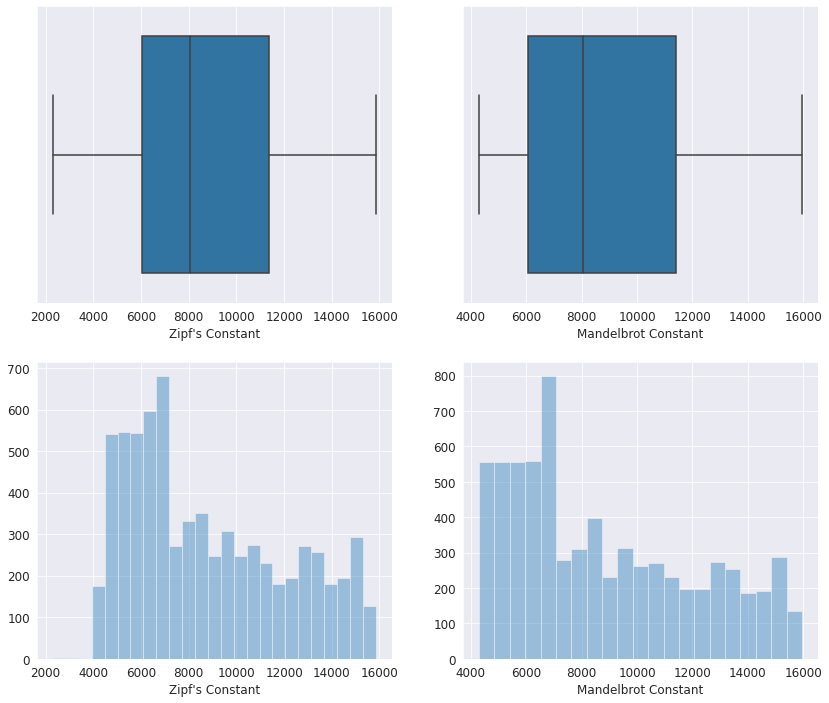

In [31]:
from matplotlib import pyplot, rcParams
import seaborn as sns
import matplotlib as mpl
rcParams.update({'font.size':12, 'figure.figsize':(14,12)})

fig, ax = pyplot.subplots(2,2)
sns.set_style('darkgrid')
sns.boxplot(table["Zipf's Constant"], ax=ax[0][0])
sns.boxplot(table["Mandelbrot Constant"], ax=ax[0][1])
sns.distplot(table["Zipf's Constant"], kde=False, ax=ax[1][0])
sns.distplot(table["Mandelbrot Constant"], kde=False, ax=ax[1][1])
pyplot.show()

## Insights:

### By visualizing boxplots, it can be expressed that mean, median, first quartile and third quartile values of empirical constants are almost equal for both empirical laws. Maximum value of empirical constant is also almost same for both laws. However minimum value of empirical constant of Zipf's law is much lower than that of Mandelbrot's approximation. 

### By visualizing distribution plots, it can be concluded that Mandelbrot's approximation is convincing for top ranks (such as 1, 2, 3,....) compared to Zipf's law. However both performs almost in the same way as rank lowers.

#### Let's meet with some other analysis later!